# ***Titanic Classifier : Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.***

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Data collection

In [2]:
titanic_dataset = pd.read_csv('/content/titanic_dataset.csv')
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_dataset.shape

(891, 12)

In [4]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Pre-Processing

In [6]:
# Removing all null values
# 1. CABIN
# 2. AGE (replace null values with mean)
# 3. EMBARKED (replace null values with mode)

titanic_dataset = titanic_dataset.drop(columns = 'Cabin', axis = 1)

titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace = True)

titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [7]:
print(titanic_dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [8]:
print(titanic_dataset['Embarked'].mode()[0])

S


In [9]:
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace= True)


In [10]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [11]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic_dataset['Survived'].value_counts()
# Note: 0 --> Did not survive &  1 --> Survived

Survived
0    549
1    342
Name: count, dtype: int64

# Data Visualizatiom

In [13]:
titanic_dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

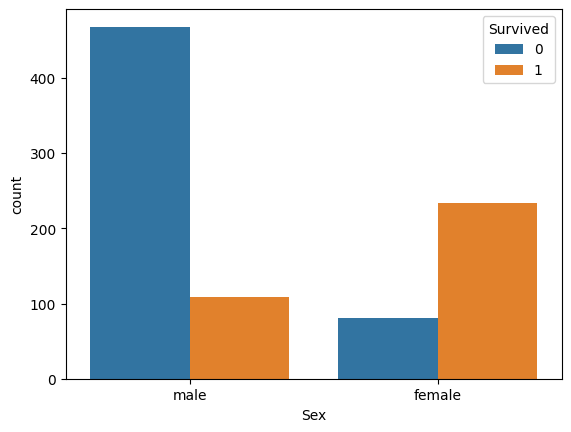

In [17]:
sns.countplot(x = 'Sex' , hue = 'Survived', data = titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

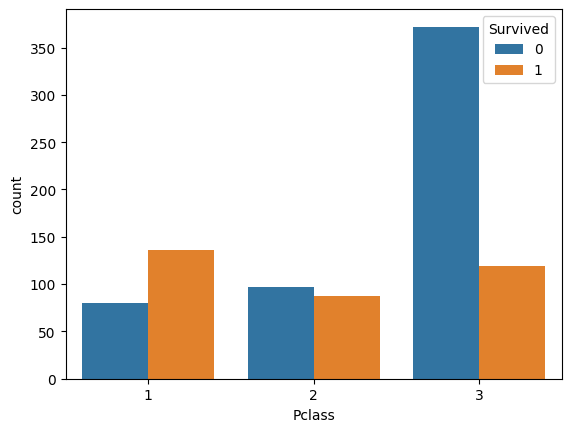

In [16]:
sns.countplot(x = 'Pclass' , hue = 'Survived', data = titanic_dataset)

# Data Encoding

In [18]:
# Renaming categorical data

titanic_dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
titanic_dataset['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [20]:
titanic_dataset.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [21]:
X = titanic_dataset.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Y = titanic_dataset['Survived']

In [22]:
print(X)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]


In [23]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Spliting data into "Train data" & "Test data"

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


**Logistic Regression**

In [32]:
# 'X' is DataFrame and 'Y' is target variable

X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'])

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=2)

# Fitting the model
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing the Model

In [33]:
# Checking accuracy of train data

X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 1 0 

In [34]:
!pip install scikit-learn

In [35]:
# Calculating accuracy score
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.8047752808988764


In [36]:
# Checking accuracy of test data

X_test_prediction = model.predict(X_test)

In [37]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [38]:
# Calculating accuracy score
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of the testing data: ', testing_data_accuracy)

Accuracy score of the testing data:  0.770949720670391


In [52]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

In [40]:
!pip install pyngrok

In [41]:
import subprocess
import os
from pyngrok import ngrok

# Setting up ngrok with authtoken
ngrok.set_auth_token("2jJz08fS6IExXRNqpvVATslhkNF_3Kny52poUhJurYwNNAhUb")

# Running the flask app
os.system("nohup python -m flask run --no-reload &")

# Open ngrok tunnel
proc = subprocess.Popen(["ngrok", "http", "5000"])

# Retriving ngrok public url
public_url = ngrok.connect(addr = "5000", proto = "http")


In [42]:
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://7e69-34-90-82-253.ngrok-free.app" -> "http://localhost:5000"


In [43]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

In [55]:
model = joblib.load('titanic_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    html_form = """
    <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Classifier</title>
    <style>
        body {
            background-color: black;
            color: white;
            font-family: Times-new-roman, serif;
            text-align: center;
            padding: 20px;
        }
        #predictionForm {
            display: inline-block;
            text-align: left;
        }
        img {
            max-width: 70%;
            height: auto;
        }
    </style>
</head>
<body>
    <h2>Titanic Survival Classifier</h2>
    <form id="predictionForm" method="post" action="/predict">
        <label for="pclass">Passenger Class:</label>
        <input type="text" id="pclass" name="pclass"><br><br>

        <label for="sex">Sex (0 for male, 1 for female):</label>
        <input type="text" id="sex" name="sex"><br><br>

        <label for="age">Age:</label>
        <input type="text" id="age" name="age"><br><br>

        <label for="sibsp">Sibling/Spouse:</label>
        <input type="text" id="sibsp" name="sibsp"><br><br>

        <label for="parch">Parent/Children:</label>
        <input type="text" id="parch" name="parch"><br><br>

        <label for="fare">Fare:</label>
        <input type="text" id="fare" name="fare"><br><br>

        <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
        <input type="text" id="embarked" name="embarked"><br><br>

        <button type="button" onclick="predictSurvival()">Predict Survival</button>
    </form>

    <p id="predictionResult"></p>

    <img src="https://focus.belfasttelegraph.co.uk/thumbor/QbW5L1Cbk7j1DGp50FzHi-iWoAw=/0x302:3898x2452/960x640/prod-mh-ireland/4aeddde6-91a5-11ed-bd89-0210609a3fe2.jpg" alt="Titanic Image">

    <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
                }
            };
            xhr.send(data);
        }
    </script>
</body>
</html>

    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    run_flask_app()
except KeyboardInterrupt:
    ngrok.kill()

Public URL: NgrokTunnel: "https://ec0d-34-90-82-253.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [16/Jul/2024 13:47:18] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Jul/2024 13:47:19] "GET /favicon.ico HTTP/1.1" 404 -
